We don't want to do factor-based or projection-based as it makes our models less interpretable

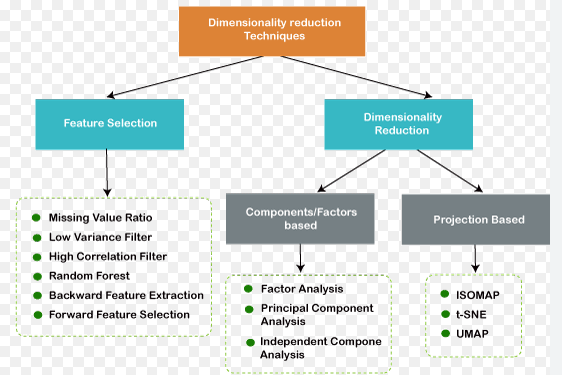

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd

In [4]:
pd.set_option('display.max_columns', None)

In [147]:
resale_train = pd.read_csv("gdrive/MyDrive/dataset/ST4248/train_df_one_hot_scaled.csv")
resale_test = pd.read_csv("gdrive/MyDrive/dataset/ST4248/test_df_one_hot_scaled.csv")

In [6]:
resale_train.head()

floor_area_sqm  resale_price  remaining_lease  nearest_mrt_dist  \
0       -1.132448     -0.997600        -1.143025         -0.676490   
1       -2.010290     -1.428424         1.352967          0.201327   
2        1.166660      0.182737        -0.290599         -0.384369   
3        0.372423     -0.720221        -0.613741          1.731095   
4       -0.087399      0.135524         0.857112          1.054745   

   nearest_mall_dist  nearest_school_dist  nearest_bus_stop_dist  \
0           1.391526            -0.314152              -0.582863   
1          -1.475172            -0.197600              -1.050430   
2          -1.093044            -0.119733               0.511379   
3           0.124256            -0.434751               0.902773   
4          -0.447118            -0.797060              -0.407861   

   nearest_primary_school_dist  within_1_km_to_nearest_primary_school  \
0                    -0.321149                               0.202522   
1                    -0.472165                               0.202522   
2                    -0.408948                               0.202522   
3                     1.113424                               0.202522   
4                    -0.958834                               0.202522   

   total_nearby_mrt  total_nearby_mall  total_nearby_school  \
0         -0.040003          -1.216171            -0.165240   
1         -0.040003          -0.468410             0.246170   
2         -0.040003           1.774872            -0.165240   
3         -0.824070          -0.468410            -0.576651   
4         -0.824070           0.279351             1.068990   

   total_nearby_primary_school  total_nearby_bus_stop  total_resales_in_town  \
0                    -0.680867               0.486670              -0.443615   
1                    -0.057431              -0.375264               1.252320   
2                    -0.057431               1.348604              -0.198538   
3                    -0.057431              -0.375264               1.252320   
4                     1.812876               0.486670               1.291532   

   total_resales_in_block  total_resales_in_street  month_2023-01  \
0               -0.777346                 0.073626      -1.164105   
1                0.477218                 2.439851       0.859029   
2               -0.463705                -0.577086       0.859029   
3               -0.463705                -0.281308      -1.164105   
4               -1.090987                 0.724338      -1.164105   

   month_2023-02  town_ANG MO KIO  town_BEDOK  town_BISHAN  town_BUKIT BATOK  \
0       1.164105         4.795832   -0.235914     -0.11238         -0.208514   
1      -0.859029        -0.208514   -0.235914     -0.11238         -0.208514   
2      -0.859029        -0.208514   -0.235914     -0.11238         -0.208514   
3       1.164105        -0.208514   -0.235914     -0.11238         -0.208514   
4       1.164105        -0.208514   -0.235914     -0.11238         -0.208514   

   town_BUKIT MERAH  town_BUKIT PANJANG  town_BUKIT TIMAH  town_CENTRAL AREA  \
0         -0.193241           -0.173416         -0.033691          -0.098646   
1         -0.193241           -0.173416         -0.033691          -0.098646   
2         -0.193241           -0.173416         -0.033691          -0.098646   
3         -0.193241           -0.173416         -0.033691          -0.098646   
4         -0.193241           -0.173416         -0.033691          -0.098646   

   town_CHOA CHU KANG  town_CLEMENTI  town_GEYLANG  town_HOUGANG  \
0           -0.231190      -0.168142     -0.162716     -0.235244   
1           -0.231190      -0.168142     -0.162716     -0.235244   
2            4.325448      -0.168142     -0.162716     -0.235244   
3           -0.231190      -0.168142     -0.162716     -0.235244   
4           -0.231190      -0.168142     -0.162716     -0.235244   

   town_JURONG EAST  town_JURONG WEST  town_KALLANG/WHAMPOA  \
0         -0.148379      

# Correlation

In [148]:
corr = resale_train.corr()
# corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps
corr.head()

floor_area_sqm  resale_price  remaining_lease  \
floor_area_sqm           1.000000      0.692109         0.071207   
resale_price             0.692109      1.000000         0.364672   
remaining_lease          0.071207      0.364672         1.000000   
nearest_mrt_dist         0.009446     -0.081105         0.294925   
nearest_mall_dist       -0.035405     -0.037166        -0.198751   

                   nearest_mrt_dist  nearest_mall_dist  nearest_school_dist  \
floor_area_sqm             0.009446          -0.035405            -0.093152   
resale_price              -0.081105          -0.037166             0.031534   
remaining_lease            0.294925          -0.198751             0.031569   
nearest_mrt_dist           1.000000           0.004373             0.032976   
nearest_mall_dist          0.004373           1.000000             0.086430   

                   nearest_bus_stop_dist  nearest_primary_school_dist  \
floor_area_sqm                 -0.002910                    -0.071221   
resale_price                   -0.000502                     0.017244   
remaining_lease                -0.048962                    -0.010859   
nearest_mrt_dist                0.025851                     0.097164   
nearest_mall_dist               0.086302                     0.143746   

                   within_1_km_to_nearest_primary_school  total_nearby_mrt  \
floor_area_sqm                                  0.045412         -0.090393   
resale_price                                   -0.011292          0.096174   
remaining_lease                                -0.023548         -0.280646   
nearest_mrt_dist                               -0.116687         -0.580082   
nearest_mall_dist                              -0.065206         -0.012704   

                   total_nearby_mall  total_nearby_school  \
floor_area_sqm              0.018484             0.117230   
resale_price                0.007714            -0.069290   
remaining_lease            -0.031390            -0.006864   
nearest_mrt_dist           -0.127602            -0.085189   
nearest_mall_dist          -0.595760            -0.235500   

                   total_nearby_primary_school  total_nearby_bus_stop  \
floor_area_sqm                        0.116520               0.060985   
resale_price                         -0.063294               0.001982   
remaining_lease                       0.113916               0.094713   
nearest_mrt_dist                      0.018325              -0.070347   
nearest_mall_dist                    -0.290052              -0.208795   

                   total_resales_in_town  total_resales_in_block  \
floor_area_sqm                  0.060588               -0.127058   
resale_price                   -0.152651               -0.105766   
remaining_lease                 0.306065               -0.331120   
nearest_mrt_dist                0.183470               -0.091601   
nearest_mall_dist              -0.218780                0.111371   

                   total_resales_in_street  month_2023-01  month_2023-02  \
floor_area_sqm                   -0.096247       0.003950      -0.003950   
resale_price                     -0.105676       0.025993      -0.025993   
remaining_lease                   0.224785       0.019407      -0.019407   
nearest_mrt_dist                  0.202131      -0.012119       0.012119   
nearest_mall_dist                -0.004019      -0.014121       0.014121   

                   town_ANG MO KIO  town_BEDOK  town_BISHAN  town_BUKIT BATOK  \
floor_area_sqm           -0.103134   -0.064837     0.024663         -0.007432   
resale_price             -0.027690   -0.081608     0.099140          0.035063   
remaining_lease          -0.127026   -0.199669    -0.064831          0.085877   
nearest_mrt_dist         -0.028416   -0.072950    -0.019101         -0.034485   
nearest_mall_dist         0.025483    0.315331    -0.014550          0.120602   

                   town_BUKIT MERAH  town_BUKIT PANJANG  town_BUKIT 

In [149]:
(np.abs(corr) > 0.5).sum().sum()

10526

# Filter Method

## Remove columns with 0 variance (Variance Threshold)

In [161]:
removed_columns = []
for column in resale_train.columns:
    if sum(resale_train[column] != 0) == 0:
        removed_columns += [column]

In [162]:
len(removed_columns)

233

In [163]:
resale_train.drop(removed_columns, axis = 1, inplace = True)
resale_test.drop(removed_columns, axis = 1, inplace = True)

## Remove columns with low variance (Variance Threshold)

We will not cover this in report and slides cause this method is controversial (might or might not be useful for the model perf), but we did it here so that we can save time for the feature selection methods. Most likely, these features wont be selected later on.

In [164]:
removed_columns = []
for column in resale_train.columns:
    if sum(resale_train[column] > 0) < 5:
        removed_columns += [column]

In [165]:
len(removed_columns)

2679

In [166]:
resale_train.drop(removed_columns, axis = 1, inplace = True)
resale_test.drop(removed_columns, axis = 1, inplace = True)

# Wrapper Method

## Forward Selection

In [ ]:
import sys
import joblib

sys.modules['sklearn.externals.joblib'] = joblib

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=300, forward=True, verbose=2, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(resale_train.drop(["resale_price"], axis = 1), resale_train["resale_price"])

feat_names = list(sfs1.k_feature_names_)
print(feat_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1268 out of 1268 | elapsed:    9.1s finished

[2023-03-18 05:55:30] Features: 1/300 -- score: -0.5215699174285054[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1267 out of 1267 | elapsed:   12.0s finished

[2023-03-18 05:55:42] Features: 2/300 -- score: -0.42184538934992377[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1266 out of 1266 | elapsed:   12.2s finished

[2023-03-18 05:55:54] Features: 3/300 -- score: -0.3290678211240784[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_job

['floor_area_sqm', 'remaining_lease', 'nearest_mrt_dist', 'nearest_mall_dist', 'total_nearby_mrt', 'total_resales_in_town', 'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST', 'town_MARINE PARADE', 'town_PASIR RIS', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON', 'block_2', 'street_name_ANG MO KIO AVE 3', 'street_name_ANG MO KIO ST 51', 'street_name_BANGKIT RD', 'street_name_BOON LAY DR', 'street_name_CANTONMENT RD', 'street_name_DAWSON RD', 'street_name_HOLLAND DR', 'street_name_HOUGANG ST 51', 'street_name_JLN BAHAGIA', 'street_name_JURONG WEST ST 42', 'street_name_SUMANG LANE', 'street_name_SUMANG WALK', 'street_name_TAMPINES AVE 9', 'street_name_WHAMPOA DR', 'street_name_YISHUN AVE 9', 'street_name_YISHUN ST 31', 'street_name_YISHUN ST 81', 'street_name_YUAN CHING RD', 'storey_range_01 TO 03', 'storey_range_04 TO 06', 'storey_range_07 TO 09', 'storey_ran


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [ ]:
sfs_features = list(sfs1.subsets_[100]["feature_names"])

['floor_area_sqm',
 'remaining_lease',
 'nearest_mrt_dist',
 'nearest_mall_dist',
 'total_nearby_mrt',
 'total_resales_in_town',
 'town_BUKIT BATOK',
 'town_BUKIT MERAH',
 'town_BUKIT PANJANG',
 'town_CENTRAL AREA',
 'town_CHOA CHU KANG',
 'town_HOUGANG',
 'town_JURONG EAST',
 'town_JURONG WEST',
 'town_MARINE PARADE',
 'town_PASIR RIS',
 'town_SEMBAWANG',
 'town_SENGKANG',
 'town_SERANGOON',
 'block_2',
 'street_name_ANG MO KIO ST 51',
 'street_name_BANGKIT RD',
 'street_name_BOON LAY DR',
 'street_name_CANTONMENT RD',
 'street_name_DAWSON RD',
 'street_name_HOLLAND DR',
 'street_name_HOUGANG ST 51',
 'street_name_JLN BAHAGIA',
 'street_name_JURONG WEST ST 42',
 'street_name_SUMANG LANE',
 'street_name_SUMANG WALK',
 'street_name_TAMPINES AVE 9',
 'street_name_YISHUN AVE 9',
 'street_name_YISHUN ST 31',
 'street_name_YISHUN ST 81',
 'street_name_YUAN CHING RD',
 'storey_range_01 TO 03',
 'storey_range_04 TO 06',
 'storey_range_07 TO 09',
 'storey_range_10 TO 12',
 'storey_range_13 TO 

In [117]:
sfs_features = ['floor_area_sqm',
 'remaining_lease',
 'nearest_mrt_dist',
 'nearest_mall_dist',
 'total_nearby_mrt',
 'total_resales_in_town',
 'town_BUKIT BATOK',
 'town_BUKIT MERAH',
 'town_BUKIT PANJANG',
 'town_CENTRAL AREA',
 'town_CHOA CHU KANG',
 'town_HOUGANG',
 'town_JURONG EAST',
 'town_JURONG WEST',
 'town_MARINE PARADE',
 'town_PASIR RIS',
 'town_SEMBAWANG',
 'town_SENGKANG',
 'town_SERANGOON',
 'block_2',
 'street_name_ANG MO KIO ST 51',
 'street_name_BANGKIT RD',
 'street_name_BOON LAY DR',
 'street_name_CANTONMENT RD',
 'street_name_DAWSON RD',
 'street_name_HOLLAND DR',
 'street_name_HOUGANG ST 51',
 'street_name_JLN BAHAGIA',
 'street_name_JURONG WEST ST 42',
 'street_name_SUMANG LANE',
 'street_name_SUMANG WALK',
 'street_name_TAMPINES AVE 9',
 'street_name_YISHUN AVE 9',
 'street_name_YISHUN ST 31',
 'street_name_YISHUN ST 81',
 'street_name_YUAN CHING RD',
 'storey_range_01 TO 03',
 'storey_range_04 TO 06',
 'storey_range_07 TO 09',
 'storey_range_10 TO 12',
 'storey_range_13 TO 15',
 'storey_range_16 TO 18',
 'storey_range_19 TO 21',
 'flat_model_Apartment',
 'flat_model_DBSS',
 'flat_model_Improved',
 'flat_model_Maisonette',
 'flat_model_Model A',
 'flat_model_Premium Apartment',
 'flat_model_Simplified',
 'flat_model_Type S1',
 'nearest_mrt_Admiralty',
 'nearest_mrt_Bedok North',
 'nearest_mrt_Braddell',
 'nearest_mrt_Clementi',
 'nearest_mrt_Pioneer',
 'nearest_mrt_Tampines East',
 'nearest_mrt_Woodlands',
 'nearest_mall_Boon Lay Shopping Centre',
 'nearest_mall_Buangkok Square',
 'nearest_mall_Bukit Panjang Plaza',
 'nearest_mall_Hillion Mall',
 'nearest_mall_Oasis Terraces',
 'nearest_mall_Paya Lebar Square',
 'nearest_mall_Punggol Plaza',
 'nearest_mall_Rivervale Mall',
 'nearest_mall_Sun Plaza',
 'nearest_mall_Tampines Mall',
 'nearest_mall_Teck Whye Shopping Centre',
 'nearest_mall_Thomson V',
 'nearest_mall_West Coast Plaza',
 'nearest_mall_Wisteria Mall',
 'nearest_mall_myVillage At Serangoon Garden',
 'nearest_school_ANDERSON SECONDARY SCHOOL',
 'nearest_school_ANGLO-CHINESE SCHOOL (INDEPENDENT)',
 'nearest_school_BUKIT MERAH SECONDARY SCHOOL',
 'nearest_school_CHUNG CHENG HIGH SCHOOL (YISHUN)',
 'nearest_school_MAYFLOWER SECONDARY SCHOOL',
 'nearest_school_NAN HUA HIGH SCHOOL',
 'nearest_school_NORTH VISTA PRIMARY SCHOOL',
 'nearest_school_PALM VIEW PRIMARY SCHOOL',
 'nearest_school_PUNGGOL GREEN PRIMARY SCHOOL',
 'nearest_school_YUYING SECONDARY SCHOOL',
 'nearest_bus_stop_Aft Hasanah Mque',
 'nearest_bus_stop_Blk 18',
 'nearest_bus_stop_Boon Keng Stn/Blk 102',
 'nearest_bus_stop_Layar Stn Exit A/Blk 417A',
 'nearest_bus_stop_Opp Blk 178A',
 'nearest_bus_stop_Opp Blk 565',
 "nearest_bus_stop_Opp St. Joseph's Hme",
 'nearest_primary_school_CANTONMENT PRIMARY SCHOOL',
 'nearest_primary_school_EAST SPRING PRIMARY SCHOOL',
 'nearest_primary_school_FUCHUN PRIMARY SCHOOL',
 'nearest_primary_school_HUAMIN PRIMARY SCHOOL',
 'nearest_primary_school_KHENG CHENG SCHOOL',
 'nearest_primary_school_MAHA BODHI SCHOOL',
 'nearest_primary_school_RADIN MAS PRIMARY SCHOOL',
 'nearest_primary_school_RIVERSIDE PRIMARY SCHOOL',
 'nearest_primary_school_XINMIN PRIMARY SCHOOL',
 'nearest_primary_school_ZHANGDE PRIMARY SCHOOL']

In [ ]:
list(sfs1.subsets_[10]["feature_names"])

['floor_area_sqm',
 'remaining_lease',
 'total_nearby_mrt',
 'total_resales_in_town',
 'town_BUKIT MERAH',
 'town_BUKIT PANJANG',
 'town_CHOA CHU KANG',
 'town_JURONG EAST',
 'town_PASIR RIS',
 'town_SEMBAWANG']

In [119]:
sfs_mask_df = pd.DataFrame({"column_name": resale_train.drop(["resale_price"], axis = 1).columns})

sfs_mask_df["sfs_mask"] = sfs_mask_df["column_name"].apply(lambda col: True if col in sfs_features else False)

In [182]:
sfs_mask = sfs_mask_df["sfs_mask"]

In [121]:
sfs_mask_df[sfs_mask_df["sfs_mask"] == True]

,column_name,sfs_mask
0,floor_area_sqm,True
1,remaining_lease,True
2,nearest_mrt_dist,True
3,nearest_mall_dist,True
8,total_nearby_mrt,True
...,...,...
1182,nearest_primary_school_MAHA BODHI SCHOOL,True
1217,nearest_primary_school_RADIN MAS PRIMARY SCHOOL,True
1219,nearest_primary_school_RIVERSIDE PRIMARY SCHOOL,True
1257,nearest_primary_school_XINMIN PRIMARY SCHOOL,True


In [122]:
sfs_mask_df.to_csv("sfs_mask.csv", index = False)

## RFE

### Ridge

In [123]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import RFE

# Init/fit
rfe = RFE(
    estimator=Ridge(), n_features_to_select=100
)

_ = rfe.fit(resale_train.drop(["resale_price"], axis = 1), resale_train["resale_price"])

ridge_mask = rfe.support_
ridge_mask

array([ True,  True,  True, ..., False, False, False])

In [124]:
rfe.ranking_

array([  1,   1,   1, ..., 485, 530, 186])

In [125]:
ridge_mask_df = pd.DataFrame({"column_name": resale_train.drop(["resale_price"], axis = 1).columns, "ridge_mask": ridge_mask})
ridge_mask_df.to_csv("ridge_mask.csv", index = False)

In [135]:
ridge_mask_df[ridge_mask_df["ridge_mask"] == True]

,column_name,ridge_mask
0,floor_area_sqm,True
1,remaining_lease,True
2,nearest_mrt_dist,True
3,nearest_mall_dist,True
13,total_resales_in_town,True
...,...,...
1169,nearest_primary_school_JIEMIN PRIMARY SCHOOL,True
1190,nearest_primary_school_NAN HUA PRIMARY SCHOOL,True
1214,nearest_primary_school_QIFA PRIMARY SCHOOL,True
1217,nearest_primary_school_RADIN MAS PRIMARY SCHOOL,True


### Gradient Boosting

In [126]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Gradient Boosting Regressor
rfe = RFE(
    estimator=GradientBoostingRegressor(),
    n_features_to_select=100,
    step = 0.05
)
_ = rfe.fit(resale_train.drop(["resale_price"], axis = 1), resale_train["resale_price"])

gb_mask = rfe.support_

In [127]:
gb_mask_df = pd.DataFrame({"column_name": resale_train.drop(["resale_price"], axis = 1).columns, "gb_mask": gb_mask})
gb_mask_df.to_csv("gb_mask.csv", index = False)

In [128]:
gb_mask_df[gb_mask_df["gb_mask"] == 1].loc[0:15]

,column_name,gb_mask
0,floor_area_sqm,True
1,remaining_lease,True
2,nearest_mrt_dist,True
3,nearest_mall_dist,True
4,nearest_school_dist,True
5,nearest_bus_stop_dist,True
6,nearest_primary_school_dist,True
8,total_nearby_mrt,True
9,total_nearby_mall,True
10,total_nearby_school,True


# Embedded Method

## Best Subset Selection

### Mutual Info Regression

In [129]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=100)
X_new = selector.fit_transform(resale_train.drop(["resale_price"], axis = 1), resale_train["resale_price"])

In [130]:
X_new.shape

(3528, 100)

In [131]:
mutual_info_mask = selector.get_support()

In [181]:
mutual_info_mask

array([ True,  True,  True, ..., False, False, False])

In [133]:
mutual_info_mask_df = pd.DataFrame({"column_name": resale_train.drop(["resale_price"], axis = 1).columns, "mutual_info_mask": mutual_info_mask})
mutual_info_mask_df.to_csv("mutual_info_mask.csv", index = False)

In [143]:
mutual_info_mask_df[:15]

,column_name,mutual_info_mask
0,floor_area_sqm,True
1,remaining_lease,True
2,nearest_mrt_dist,True
3,nearest_mall_dist,True
4,nearest_school_dist,True
5,nearest_bus_stop_dist,False
6,nearest_primary_school_dist,True
7,within_1_km_to_nearest_primary_school,False
8,total_nearby_mrt,True
9,total_nearby_mall,False


### F Regression

In [136]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector = SelectKBest(f_regression, k=100)
X_new = selector.fit_transform(resale_train.drop(["resale_price"], axis = 1), resale_train["resale_price"])

In [137]:
X_new.shape

(3528, 100)

In [138]:
f_reg_mask = selector.get_support()

In [139]:
f_reg_mask

array([ True,  True,  True, ...,  True, False, False])

In [140]:
f_reg_mask_df = pd.DataFrame({"column_name": resale_train.drop(["resale_price"], axis = 1).columns, "f_reg_mask": f_reg_mask})
f_reg_mask_df.to_csv("f_reg_mask.csv", index = False)

In [142]:
f_reg_mask_df[:15]

,column_name,f_reg_mask
0,floor_area_sqm,True
1,remaining_lease,True
2,nearest_mrt_dist,True
3,nearest_mall_dist,False
4,nearest_school_dist,False
5,nearest_bus_stop_dist,False
6,nearest_primary_school_dist,False
7,within_1_km_to_nearest_primary_school,False
8,total_nearby_mrt,True
9,total_nearby_mall,False


## Lasso

In [167]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

lasso_selector = SelectFromModel(Lasso(alpha=0.001), max_features = 100)
lasso_selector.fit(resale_train.drop(["resale_price"], axis = 1), resale_train["resale_price"])

SelectFromModel(estimator=Lasso(alpha=0.001), max_features=100)

In [176]:
lasso_mask = lasso_selector.get_support()
lasso_features = resale_train.drop(["resale_price"], axis = 1).loc[:,lasso_mask].columns.tolist()
print(str(len(lasso_features)), 'selected features')

100 selected features


In [177]:
lasso_mask

array([ True,  True,  True, ...,  True, False, False])

In [178]:
lasso_mask_df = pd.DataFrame({"column_name": resale_train.drop(["resale_price"], axis = 1).columns, "lasso_mask": lasso_mask})
lasso_mask_df.to_csv("lasso_mask.csv", index = False)

In [179]:
lasso_mask_df[lasso_mask_df["lasso_mask"] == True]

,column_name,lasso_mask
0,floor_area_sqm,True
1,remaining_lease,True
2,nearest_mrt_dist,True
3,nearest_mall_dist,True
8,total_nearby_mrt,True
...,...,...
933,nearest_bus_stop_Blk 18,True
1115,nearest_primary_school_BEDOK GREEN PRIMARY SCHOOL,True
1170,nearest_primary_school_JING SHAN PRIMARY SCHOOL,True
1217,nearest_primary_school_RADIN MAS PRIMARY SCHOOL,True


# Ensemble of Feature Selection

In [261]:
all_mask_dfs = [f_reg_mask_df, gb_mask_df, lasso_mask_df, mutual_info_mask_df, ridge_mask_df, sfs_mask_df]

result_df = pd.Series(resale_train.drop(["resale_price"], axis = 1).columns, name = "column_name").to_frame()

empty_list = []
for i in range(1268):
    empty_list += [[]]

result_df.loc[:, "selected_by"] = empty_list
result_df.loc[:, "total_selected"] = 0
for index, row in result_df.iterrows():
    if f_reg_mask[index]:
        row["selected_by"] += ["f_reg"]
        result_df.loc[index, "total_selected"] += 1
    if gb_mask[index]:
        row["selected_by"] += ["gb"]
        result_df.loc[index, "total_selected"] += 1
    if lasso_mask[index]:
        row["selected_by"] += ["lasso"]
        result_df.loc[index, "total_selected"] += 1
    if mutual_info_mask[index]:
        row["selected_by"] += ["mutual_info"]
        result_df.loc[index, "total_selected"] += 1
    if ridge_mask[index]:
        row["selected_by"] += ["ridge"]
        result_df.loc[index, "total_selected"] += 1
    if sfs_mask[index]:
        row["selected_by"] += ["sfs"]
        result_df.loc[index, "total_selected"] += 1

In [262]:
pd.set_option('display.max_colwidth', None)

In [263]:
result_df.head()

,column_name,selected_by,total_selected
0,floor_area_sqm,"[f_reg, gb, lasso, mutual_info, ridge, sfs]",6
1,remaining_lease,"[f_reg, gb, lasso, mutual_info, ridge, sfs]",6
2,nearest_mrt_dist,"[f_reg, gb, lasso, mutual_info, ridge, sfs]",6
3,nearest_mall_dist,"[gb, lasso, mutual_info, ridge, sfs]",5
4,nearest_school_dist,"[gb, mutual_info]",2


In [264]:
result_df[result_df["total_selected"] > 0].total_selected.value_counts()

1    202
2     57
3     35
4     21
5     13
6      5
Name: total_selected, dtype: int64

<Axes: >

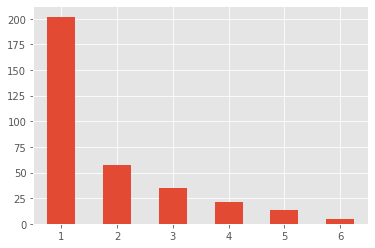

In [265]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

result_df[result_df["total_selected"] > 0].total_selected.value_counts().plot(kind='bar', rot = 0)

In [266]:
result_df.sort_values(by = "total_selected", ascending = False)[:20]

,column_name,selected_by,total_selected
0,floor_area_sqm,"[f_reg, gb, lasso, mutual_info, ridge, sfs]",6
13,total_resales_in_town,"[f_reg, gb, lasso, mutual_info, ridge, sfs]",6
2,nearest_mrt_dist,"[f_reg, gb, lasso, mutual_info, ridge, sfs]",6
1,remaining_lease,"[f_reg, gb, lasso, mutual_info, ridge, sfs]",6
22,town_BUKIT MERAH,"[f_reg, gb, lasso, mutual_info, ridge, sfs]",6
44,flat_type_3 ROOM,"[f_reg, gb, lasso, mutual_info, ridge]",5
268,street_name_CANTONMENT RD,"[f_reg, gb, lasso, ridge, sfs]",5
473,storey_range_01 TO 03,"[f_reg, gb, lasso, ridge, sfs]",5
474,storey_range_04 TO 06,"[f_reg, gb, lasso, ridge, sfs]",5
479,storey_range_19 TO 21,"[f_reg, gb, lasso, ridge, sfs]",5


In [267]:
result_df[result_df["total_selected"] == 4]

,column_name,selected_by,total_selected
21,town_BUKIT BATOK,"[lasso, mutual_info, ridge, sfs]",4
23,town_BUKIT PANJANG,"[gb, lasso, ridge, sfs]",4
25,town_CHOA CHU KANG,"[gb, lasso, ridge, sfs]",4
28,town_HOUGANG,"[gb, lasso, ridge, sfs]",4
32,town_MARINE PARADE,"[lasso, mutual_info, ridge, sfs]",4
36,town_SEMBAWANG,"[gb, lasso, ridge, sfs]",4
43,flat_type_2 ROOM,"[f_reg, gb, mutual_info, ridge]",4
46,flat_type_5 ROOM,"[f_reg, gb, mutual_info, ridge]",4
47,flat_type_EXECUTIVE,"[f_reg, gb, mutual_info, ridge]",4
321,street_name_JLN BAHAGIA,"[gb, lasso, ridge, sfs]",4


In [268]:
result_df[result_df["total_selected"] == 3]

,column_name,selected_by,total_selected
14,total_resales_in_block,"[f_reg, gb, mutual_info]",3
15,total_resales_in_street,"[f_reg, gb, mutual_info]",3
18,town_ANG MO KIO,"[gb, lasso, ridge]",3
19,town_BEDOK,"[f_reg, gb, lasso]",3
24,town_CENTRAL AREA,"[f_reg, mutual_info, sfs]",3
29,town_JURONG EAST,"[gb, lasso, sfs]",3
35,town_QUEENSTOWN,"[f_reg, gb, lasso]",3
37,town_SENGKANG,"[lasso, ridge, sfs]",3
39,town_TAMPINES,"[gb, lasso, mutual_info]",3
41,town_WOODLANDS,"[gb, lasso, ridge]",3


In [269]:
result_df[result_df["total_selected"] == 2]

,column_name,selected_by,total_selected
4,nearest_school_dist,"[gb, mutual_info]",2
6,nearest_primary_school_dist,"[gb, mutual_info]",2
10,total_nearby_school,"[gb, mutual_info]",2
12,total_nearby_bus_stop,"[gb, mutual_info]",2
30,town_JURONG WEST,"[gb, sfs]",2
34,town_PUNGGOL,"[gb, mutual_info]",2
38,town_SERANGOON,"[ridge, sfs]",2
42,town_YISHUN,"[f_reg, ridge]",2
105,block_2,"[lasso, sfs]",2
219,street_name_ANG MO KIO AVE 10,"[f_reg, ridge]",2


In [271]:
result_df.sort_values(by = "total_selected", ascending = False).to_csv("selected_features_complete.csv", index = False)

# Selecting Columns with Total Selected >= 3

In [288]:
final_columns = result_df[result_df["total_selected"] >= 3].sort_values(by = "total_selected", ascending = False).column_name.to_list()

In [289]:
final_columns += ["resale_price"]

In [286]:
resale_train[final_columns].to_csv("resale_train_feature_selection.csv", index = False)
resale_test[final_columns].to_csv("resale_test_feature_selection.csv", index = False)